In [1]:
# 라이브러리 호출
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW3_package/hw3_prob1a.mat"
mat_data = scipy.io.loadmat(mat_path)

# 변수 할당
A = mat_data['A']
b = mat_data['b']
x_orig = mat_data['x_orig']

In [3]:
def g(x):
    return (np.linalg.norm((A @ x - b), 2) ** 2)

def h(x):
    return lambda_v * np.linalg.norm(x, 1)

def f(x):
    return g(x)/2 + h(x)

In [4]:
def grad_g(x):
    return A.T @ (A @ x - b)

In [5]:
# ISTA
x = np.zeros((A.shape[1], 1))

lambda_v = 2
# t = 1/L 
t =  1/ np.linalg.norm(A, 2) ** 2
stopping_point = 1e-4

arr_x = []
while True:
    x_minus1 = x
    # step 1. consider g(x)  
    g_x = x - t * grad_g(x)
    # step 2. soft thresholding
    x = np.sign(g_x) * np.maximum(np.abs(g_x) - lambda_v * t, 0)

    # break check 
    if  (np.linalg.norm((x - x_minus1), 2) / np.linalg.norm(x, 2)) < stopping_point:
        break    

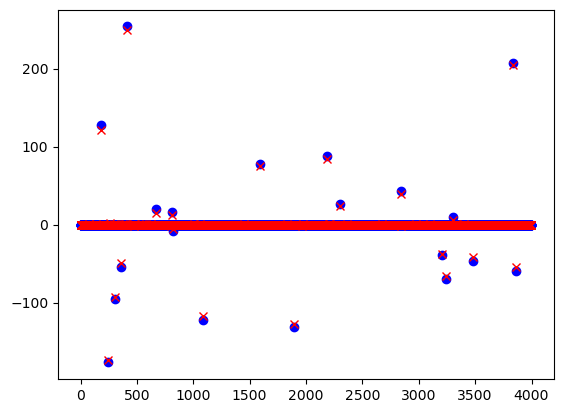

In [6]:
plt.plot(x_orig,'bo')
plt.plot(x,"rx" )
plt.show()